![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de una bicicleta durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [dicccionario de datos](https://www.kaggle.com/c/bike-sharing-demand/data).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [160]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz, DecisionTreeClassifier

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, plot_confusion_matrix, auc, roc_curve, make_scorer
from sklearn.ensemble import BaggingClassifier

import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)
# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)
# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour
# Visualización
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables hour y workingday, escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

In [5]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [6]:
bikes.groupby('workingday').total.describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


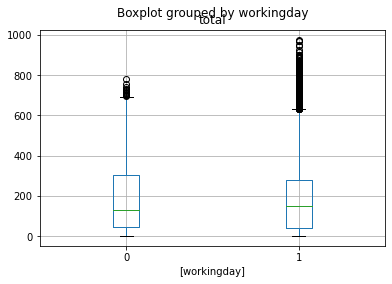

In [10]:
bikes.boxplot(column=['total'], by=['workingday'])

In [11]:
bikes.groupby('hour').total.describe()

,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0,455.0,55.138462,43.620012,2.0,24.00,41.0,74.50,283.0
1,454.0,33.859031,34.112105,1.0,11.00,19.0,46.00,168.0
2,448.0,22.899554,26.110267,1.0,5.00,11.0,32.00,119.0
3,433.0,11.757506,12.666442,1.0,3.00,6.0,15.00,66.0
4,442.0,6.407240,4.217633,1.0,3.00,6.0,9.00,28.0
5,452.0,19.767699,12.784293,1.0,8.00,19.0,29.00,57.0
6,455.0,76.259341,54.745333,1.0,24.50,75.0,118.00,213.0
7,455.0,213.116484,159.207044,1.0,63.00,208.0,334.00,596.0
8,455.0,362.769231,231.723065,8.0,133.50,392.0,563.50,839.0


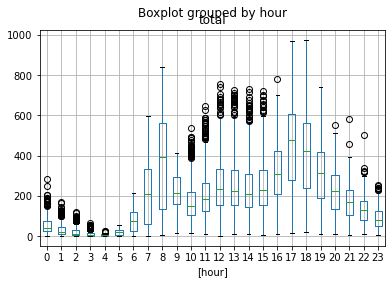

In [12]:
bikes.boxplot(column=['total'], by=['hour'])

## Respuesta:

### workingday

Hay un desvalanceo entre los datos de workingday, esto es bastante lógico debido a que los días laborales son muchos más. Por otro lado, llama la atención pues desvalanceo es de un poco más del doble (e intuitivamente debe haber más del doble de días laborales, por lo tanto podríamos hacer una exploración más profunda para encontrar las razones de esto). Por otra parte, en los días laborales se tiede a alquilar más bicicletas y hay una mayor varianza entre los registros (aunque es bastante leve esto).

### hour

Como se puede observar (especialente en el boxplot superior) la hora influye mucho en la cantidad de bicicletas alquiladas, se puede ver claramente que hay ciertas horas pico (posiblemente la hora en la que las personas entran a trabajar) y ciertas horas valle (por ejemplo la madrugada). En la mitad del día laboral la concentración de datos esta en valores muy inferiores y se encuentran muchos "outlayers".

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica de las rentas promedio por hora cuando la variable "workingday" es igual a 0 e igual a 1, respectivamente. Analice y escriba sus hallazgos.

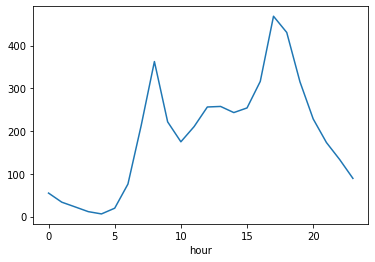

In [13]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

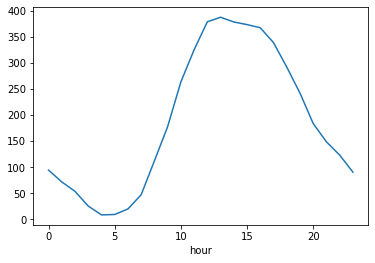

In [14]:
# Celda 2.2 - "workingday"=0 escriba su código y hallazgos 
bikes[bikes.workingday == 0].groupby('hour').total.mean().plot()

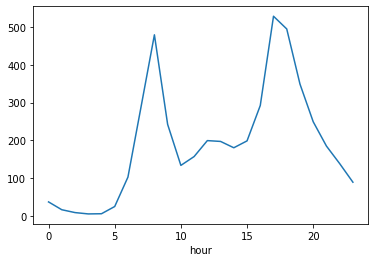

In [15]:
# Celda 2.3 - "workingday"=1 escriba su código y hallazgos 
bikes[bikes.workingday == 1].groupby('hour').total.mean().plot()

## Respuesta:

La distribución de los datos varía mucho entre días laborales y no laborales:

En los días Laborales se encuentran dos picos muy pronunciados, esto debe ser la hora de entrada y salida de las personas del trabajo. 

Por otra parte, en los días no laborales El pico se encuentra sobre el medio día y parece ser una distribución normal. 

Adicionalmente, los pormedios son superiores en los días laborales. 

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "hour" y "workingday" como las únicas variables predictoras. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [125]:
# Celda 3
RL = LinearRegression()
RL.fit(bikes[["hour", "workingday"]], bikes["total"])
print("Los coeficientes para hour y working day son: ",RL.coef_, " respectivamente.\n")
print("El intercepto es: ", RL.intercept_)

np.average(np.square(prediccionPCA-yTest))
RL.score(bikes[["hour", "workingday"]], bikes["total"])

Los coeficientes para hour y working day son:  [10.49206282  4.07248627]  respectivamente.

El intercepto es:  67.7059502619161


0.16059115011434855

## Respuesta:

La principal limitación es que en la regresión lineal se ignora el hecho de que las horas son cíclicas i.e. después de las 23 viene el cero. Adicionalmente, como el coeficiente de horas es 10.5 entonces cada hora se "aumentaría" en esa proporción el número de biciletas alquiladas, esto no límita la posibilidad de tener picos en el medio del día. (Si el día es laboral se aumenta en 4 el número de biciletas alquiladas)

Por otra parte, como se observó en el punto 2, el comportamiento de el alquiler (seún la hora) es muy diferente si el día es laboral o no. En la regresión lineal se ignora esta dependencia (o relaciñon entre variables) y se tratan como si la combinación de ambas variables no tuviera efectos. 

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "workingday". El árbol debe tener al menos 6 nodos finales.

In [119]:
# Celda 4

# Definición de la función que calcula el error cuadrático de las particiones (con respecto al promedio)
def MSE_particion(y_l, y_r):
    
    return (sum([(x-y_l.mean())**2 for x in y_l])+sum([(x-y_r.mean())**2 for x in y_r]))/(len(y_l)+len(y_r))
    
def mejor_particion(X, y): 
    
    mejor_particion = [0,0,np.inf]  # j, split, mse
    
    for j in ["hour", "workingday"]:
        
        splits = X.loc[:,j].unique()
        for split in splits:
            mse = MSE_particion(y[X[j] < split], y[X[j] >= split])
            
            if mse < mejor_particion[2]:
                mejor_particion = [j, split, mse]
    
    if (len(np.unique(X.loc[X[mejor_particion[0]] < mejor_particion[1],mejor_particion[0]])) == 0) or (len(np.unique(X.loc[X[mejor_particion[0]] >= mejor_particion[1],mejor_particion[0]])) == 0):
        mejor_particion[1] = -1
    
    return(mejor_particion)

def tree_grow(X, y, level=0):
    
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], level=level, split=-1, n_samples=1, MSE=0)
        return(tree)
    
    j, split, mse = mejor_particion(X, y)
    
    tree = dict(y_pred=y.mean(), level=level, split=-1, n_samples=X.shape[0], MSE=mse)
    
    if mse == np.inf:
        return tree
    if (len(np.unique(X[X[j] < split][j])) <= 1) or (len(np.unique(X[X[j] >= split][j])) <= 1):
        return(tree)
    
    
    # Continuar creando la partición
    X_l, y_l = X[X[j] < split], y[X[j] < split]
    X_r, y_r = X[X[j] >= split], y[X[j] >= split]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1)
    tree['sr'] = tree_grow(X_r, y_r, level + 1)
    
    return tree

def tree_predict(X, tree):
    
    predicted = np.ones(X.shape[0])
    
    # Revisar si es el nodo final
    if tree['split'] == -1:
        predicted = predicted * tree['y_pred']
            
    else:
        
        j, split = tree['split']
        filter_l = (X.loc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        predicted[filter_l] = tree_predict(X_l, tree['sl'])
        predicted[~filter_l] = tree_predict(X_r, tree['sr'])

    return predicted

tree = tree_grow(bikes[["hour", "workingday"]], bikes.total, level=0)
tree


{'y_pred': 191.57413191254824,
 'level': 0,
 'split': ['hour', 7],
 'n_samples': 10886,
 'MSE': 22567.731076849614,
 'sl': {'y_pred': 32.58203249442498,
  'level': 1,
  'split': -1,
  'n_samples': 3139,
  'MSE': 1242.1585299291157},
 'sr': {'y_pred': 255.9959984510133,
  'level': 1,
  'split': ['hour', 21],
  'n_samples': 7747,
  'MSE': 27788.436811083004,
  'sl': {'y_pred': 282.5547891519047,
   'level': 2,
   'split': ['hour', 16],
   'n_samples': 6379,
   'MSE': 29730.987752321802,
   'sl': {'y_pred': 243.9499878019029,
    'level': 3,
    'split': ['hour', 9],
    'n_samples': 4099,
    'MSE': 24010.268364570984,
    'sl': {'y_pred': 287.9428571428571,
     'level': 4,
     'split': -1,
     'n_samples': 910,
     'MSE': 24761.77690944762},
    'sr': {'y_pred': 231.3963624960803,
     'level': 4,
     'split': -1,
     'n_samples': 3189,
     'MSE': 13775.926526429728}},
   'sr': {'y_pred': 351.95877192982454,
    'level': 3,
    'split': ['hour', 19],
    'n_samples': 2280,
    'M

In [123]:
tree_predict(bikes[["hour", "workingday"]], tree)

array([ 32.58203249,  32.58203249,  32.58203249, ..., 132.15204678,
       132.15204678, 132.15204678])

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "hour" y "workingday" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de clasificación y compare desempeño con el modelo del punto 3.

In [149]:
# Celda 5
# Lista de valores para calibrar 
parameters={"splitter":["best","random"],
            "max_depth" : [1,2,3,4,5,6,7,8,9],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10] }

tuning_model=GridSearchCV(DecisionTreeRegressor(),param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)
tuning_model.fit(bikes[["hour", "workingday"]], bikes.total)
arbol = DecisionTreeRegressor(**tuning_model.best_params_, random_state=1)
print("El MSE negativo del árbol de decisión es de: ", cross_val_score(arbol, bikes[["hour", "workingday"]], bikes.total, cv=10, scoring='neg_mean_squared_error').mean())
print("Los mejores parámetros son: ", tuning_model.best_params_)


Fitting 3 folds for each of 180 candidates, totalling 540 fits
[CV] max_depth=1, min_samples_leaf=1, splitter=best ..................
[CV]  max_depth=1, min_samples_leaf=1, splitter=best, score=-21268.433, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, splitter=best ..................
[CV]  max_depth=1, min_samples_leaf=1, splitter=best, score=-17233.452, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, splitter=best ..................
[CV]  max_depth=1, min_samples_leaf=1, splitter=best, score=-43739.176, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, splitter=random ................
[CV]  max_depth=1, min_samples_leaf=1, splitter=random, score=-22648.471, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, splitter=random ................
[CV]  max_depth=1, min_samples_leaf=1, splitter=random, score=-22180.349, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, splitter=random ................
[CV]  max_depth=1, min_samples_leaf=1, splitter=random, score=-51213.525, tot

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=1, min_samples_leaf=8, splitter=best, score=-17233.452, total=   0.0s
[CV] max_depth=1, min_samples_leaf=8, splitter=best ..................
[CV]  max_depth=1, min_samples_leaf=8, splitter=best, score=-43739.176, total=   0.0s
[CV] max_depth=1, min_samples_leaf=8, splitter=random ................
[CV]  max_depth=1, min_samples_leaf=8, splitter=random, score=-22338.663, total=   0.0s
[CV] max_depth=1, min_samples_leaf=8, splitter=random ................
[CV]  max_depth=1, min_samples_leaf=8, splitter=random, score=-22729.988, total=   0.0s
[CV] max_depth=1, min_samples_leaf=8, splitter=random ................
[CV]  max_depth=1, min_samples_leaf=8, splitter=random, score=-59235.466, total=   0.0s
[CV] max_depth=1, min_samples_leaf=9, splitter=best ..................
[CV]  max_depth=1, min_samples_leaf=9, splitter=best, score=-21268.433, total=   0.0s
[CV] max_depth=1, min_samples_leaf=9, splitter=best ..................
[CV]  max_depth=1, min_samples_leaf=9, splitter=best

[CV]  max_depth=3, min_samples_leaf=6, splitter=best, score=-19925.667, total=   0.0s
[CV] max_depth=3, min_samples_leaf=6, splitter=best ..................
[CV]  max_depth=3, min_samples_leaf=6, splitter=best, score=-13931.381, total=   0.0s
[CV] max_depth=3, min_samples_leaf=6, splitter=best ..................
[CV]  max_depth=3, min_samples_leaf=6, splitter=best, score=-37055.123, total=   0.0s
[CV] max_depth=3, min_samples_leaf=6, splitter=random ................
[CV]  max_depth=3, min_samples_leaf=6, splitter=random, score=-20767.880, total=   0.0s
[CV] max_depth=3, min_samples_leaf=6, splitter=random ................
[CV]  max_depth=3, min_samples_leaf=6, splitter=random, score=-16568.894, total=   0.0s
[CV] max_depth=3, min_samples_leaf=6, splitter=random ................
[CV]  max_depth=3, min_samples_leaf=6, splitter=random, score=-42313.370, total=   0.0s
[CV] max_depth=3, min_samples_leaf=7, splitter=best ..................
[CV]  max_depth=3, min_samples_leaf=7, splitter=best

[CV]  max_depth=4, min_samples_leaf=4, splitter=random, score=-33465.782, total=   0.0s
[CV] max_depth=4, min_samples_leaf=5, splitter=best ..................
[CV]  max_depth=4, min_samples_leaf=5, splitter=best, score=-19620.962, total=   0.0s
[CV] max_depth=4, min_samples_leaf=5, splitter=best ..................
[CV]  max_depth=4, min_samples_leaf=5, splitter=best, score=-12845.576, total=   0.0s
[CV] max_depth=4, min_samples_leaf=5, splitter=best ..................
[CV]  max_depth=4, min_samples_leaf=5, splitter=best, score=-35204.522, total=   0.0s
[CV] max_depth=4, min_samples_leaf=5, splitter=random ................
[CV]  max_depth=4, min_samples_leaf=5, splitter=random, score=-19548.788, total=   0.0s
[CV] max_depth=4, min_samples_leaf=5, splitter=random ................
[CV]  max_depth=4, min_samples_leaf=5, splitter=random, score=-10756.684, total=   0.0s
[CV] max_depth=4, min_samples_leaf=5, splitter=random ................
[CV]  max_depth=4, min_samples_leaf=5, splitter=rand

[CV]  max_depth=5, min_samples_leaf=10, splitter=random, score=-18909.441, total=   0.0s
[CV] max_depth=5, min_samples_leaf=10, splitter=random ...............
[CV]  max_depth=5, min_samples_leaf=10, splitter=random, score=-11569.452, total=   0.0s
[CV] max_depth=5, min_samples_leaf=10, splitter=random ...............
[CV]  max_depth=5, min_samples_leaf=10, splitter=random, score=-28319.392, total=   0.0s
[CV] max_depth=6, min_samples_leaf=1, splitter=best ..................
[CV]  max_depth=6, min_samples_leaf=1, splitter=best, score=-18136.657, total=   0.0s
[CV] max_depth=6, min_samples_leaf=1, splitter=best ..................
[CV]  max_depth=6, min_samples_leaf=1, splitter=best, score=-7928.008, total=   0.0s
[CV] max_depth=6, min_samples_leaf=1, splitter=best ..................
[CV]  max_depth=6, min_samples_leaf=1, splitter=best, score=-26522.341, total=   0.0s
[CV] max_depth=6, min_samples_leaf=1, splitter=random ................
[CV]  max_depth=6, min_samples_leaf=1, splitter=ra

[CV]  max_depth=7, min_samples_leaf=5, splitter=random, score=-7756.000, total=   0.0s
[CV] max_depth=7, min_samples_leaf=5, splitter=random ................
[CV]  max_depth=7, min_samples_leaf=5, splitter=random, score=-27065.803, total=   0.0s
[CV] max_depth=7, min_samples_leaf=6, splitter=best ..................
[CV]  max_depth=7, min_samples_leaf=6, splitter=best, score=-18083.434, total=   0.0s
[CV] max_depth=7, min_samples_leaf=6, splitter=best ..................
[CV]  max_depth=7, min_samples_leaf=6, splitter=best, score=-7755.374, total=   0.0s
[CV] max_depth=7, min_samples_leaf=6, splitter=best ..................
[CV]  max_depth=7, min_samples_leaf=6, splitter=best, score=-26212.620, total=   0.0s
[CV] max_depth=7, min_samples_leaf=6, splitter=random ................
[CV]  max_depth=7, min_samples_leaf=6, splitter=random, score=-18758.092, total=   0.0s
[CV] max_depth=7, min_samples_leaf=6, splitter=random ................
[CV]  max_depth=7, min_samples_leaf=6, splitter=random

[CV]  max_depth=9, min_samples_leaf=1, splitter=random, score=-18664.863, total=   0.0s
[CV] max_depth=9, min_samples_leaf=1, splitter=random ................
[CV]  max_depth=9, min_samples_leaf=1, splitter=random, score=-7929.846, total=   0.0s
[CV] max_depth=9, min_samples_leaf=1, splitter=random ................
[CV]  max_depth=9, min_samples_leaf=1, splitter=random, score=-26211.393, total=   0.0s
[CV] max_depth=9, min_samples_leaf=2, splitter=best ..................
[CV]  max_depth=9, min_samples_leaf=2, splitter=best, score=-18087.042, total=   0.0s
[CV] max_depth=9, min_samples_leaf=2, splitter=best ..................
[CV]  max_depth=9, min_samples_leaf=2, splitter=best, score=-7750.876, total=   0.0s
[CV] max_depth=9, min_samples_leaf=2, splitter=best ..................
[CV]  max_depth=9, min_samples_leaf=2, splitter=best, score=-26187.955, total=   0.0s
[CV] max_depth=9, min_samples_leaf=2, splitter=random ................
[CV]  max_depth=9, min_samples_leaf=2, splitter=random

[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:    2.3s finished


In [146]:
cross_val_score(LinearRegression(), bikes[["hour", "workingday"]], bikes.total, cv=10, scoring='neg_mean_squared_error').mean()

-28852.95022019151

## Respuesta:

Como se puede observar el MSE del árbol es de 13143.121883295113 y el de la regresión es de 28852.95022019151, la diferencia es muy grande. 

La razón de esto es, como se dijo en el punto de regresión, que el árbol si tiene encuenta tanto la dependencia entre las dos variables (o las posibles relaciones en sus combinaciones) como la posibilidad de tener estacionalidades diferentes y no únicamente que comportamientos crecientes (o decrecientes) según la hora. 

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir la cantidad de reacciones en redes sociales (popularidad) de la notica. Para más detalles puede visitar el sigueinte enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [127]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [128]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [129]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [163]:
# Celda 6
parameters={"splitter":["best","random"],
            "max_depth" : [1,2,3,4,5,6,7,8,9],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10] }
tuning_model2=GridSearchCV(DecisionTreeClassifier(),param_grid=parameters,cv=3,verbose=3)
tuning_model2.fit(X_train, y_train)

modelos = {"Regresión Logística":LogisticRegression(),
          "Árbol de Decisión":DecisionTreeClassifier(**tuning_model2.best_params_)}

for model in modelos.keys():
    modelos[model].fit(X_train, y_train)
    
    test_pred = modelos[model].predict(X_test)
    print("Modelo:  ", model)
    print("F1 score: ", f1_score(y_test, test_pred))
    print("Accuracy: ", accuracy_score(y_test, test_pred))
    print('Precision:', precision_score(y_test, test_pred))
    print('Recall:', recall_score(y_test, test_pred))
    print("________________________________")


Fitting 3 folds for each of 180 candidates, totalling 540 fits
[CV] max_depth=1, min_samples_leaf=1, splitter=best ..................
[CV]  max_depth=1, min_samples_leaf=1, splitter=best, score=0.627, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, splitter=best ..................
[CV]  max_depth=1, min_samples_leaf=1, splitter=best, score=0.641, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, splitter=best ..................
[CV]  max_depth=1, min_samples_leaf=1, splitter=best, score=0.617, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, splitter=random ................
[CV]  max_depth=1, min_samples_leaf=1, splitter=random, score=0.572, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, splitter=random ................
[CV]  max_depth=1, min_samples_leaf=1, splitter=random, score=0.556, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, splitter=random ................
[CV]  max_depth=1, min_samples_leaf=1, splitter=random, score=0.575, total=   0.0s
[CV] max_depth=1, m

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=1, min_samples_leaf=4, splitter=best, score=0.627, total=   0.0s
[CV] max_depth=1, min_samples_leaf=4, splitter=best ..................
[CV]  max_depth=1, min_samples_leaf=4, splitter=best, score=0.641, total=   0.0s
[CV] max_depth=1, min_samples_leaf=4, splitter=best ..................
[CV]  max_depth=1, min_samples_leaf=4, splitter=best, score=0.617, total=   0.0s
[CV] max_depth=1, min_samples_leaf=4, splitter=random ................
[CV]  max_depth=1, min_samples_leaf=4, splitter=random, score=0.573, total=   0.0s
[CV] max_depth=1, min_samples_leaf=4, splitter=random ................
[CV]  max_depth=1, min_samples_leaf=4, splitter=random, score=0.543, total=   0.0s
[CV] max_depth=1, min_samples_leaf=4, splitter=random ................
[CV]  max_depth=1, min_samples_leaf=4, splitter=random, score=0.579, total=   0.0s
[CV] max_depth=1, min_samples_leaf=5, splitter=best ..................
[CV]  max_depth=1, min_samples_leaf=5, splitter=best, score=0.627, total=   0.0s
[

[CV]  max_depth=2, min_samples_leaf=4, splitter=best, score=0.617, total=   0.0s
[CV] max_depth=2, min_samples_leaf=4, splitter=random ................
[CV]  max_depth=2, min_samples_leaf=4, splitter=random, score=0.569, total=   0.0s
[CV] max_depth=2, min_samples_leaf=4, splitter=random ................
[CV]  max_depth=2, min_samples_leaf=4, splitter=random, score=0.580, total=   0.0s
[CV] max_depth=2, min_samples_leaf=4, splitter=random ................
[CV]  max_depth=2, min_samples_leaf=4, splitter=random, score=0.565, total=   0.0s
[CV] max_depth=2, min_samples_leaf=5, splitter=best ..................
[CV]  max_depth=2, min_samples_leaf=5, splitter=best, score=0.627, total=   0.0s
[CV] max_depth=2, min_samples_leaf=5, splitter=best ..................
[CV]  max_depth=2, min_samples_leaf=5, splitter=best, score=0.641, total=   0.0s
[CV] max_depth=2, min_samples_leaf=5, splitter=best ..................
[CV]  max_depth=2, min_samples_leaf=5, splitter=best, score=0.617, total=   0.0s
[

[CV]  max_depth=3, min_samples_leaf=4, splitter=random, score=0.597, total=   0.0s
[CV] max_depth=3, min_samples_leaf=4, splitter=random ................
[CV]  max_depth=3, min_samples_leaf=4, splitter=random, score=0.623, total=   0.0s
[CV] max_depth=3, min_samples_leaf=4, splitter=random ................
[CV]  max_depth=3, min_samples_leaf=4, splitter=random, score=0.601, total=   0.0s
[CV] max_depth=3, min_samples_leaf=5, splitter=best ..................
[CV]  max_depth=3, min_samples_leaf=5, splitter=best, score=0.629, total=   0.0s
[CV] max_depth=3, min_samples_leaf=5, splitter=best ..................
[CV]  max_depth=3, min_samples_leaf=5, splitter=best, score=0.627, total=   0.0s
[CV] max_depth=3, min_samples_leaf=5, splitter=best ..................
[CV]  max_depth=3, min_samples_leaf=5, splitter=best, score=0.612, total=   0.0s
[CV] max_depth=3, min_samples_leaf=5, splitter=random ................
[CV]  max_depth=3, min_samples_leaf=5, splitter=random, score=0.615, total=   0.0s

[CV]  max_depth=4, min_samples_leaf=4, splitter=random, score=0.610, total=   0.0s
[CV] max_depth=4, min_samples_leaf=4, splitter=random ................
[CV]  max_depth=4, min_samples_leaf=4, splitter=random, score=0.607, total=   0.0s
[CV] max_depth=4, min_samples_leaf=5, splitter=best ..................
[CV]  max_depth=4, min_samples_leaf=5, splitter=best, score=0.613, total=   0.0s
[CV] max_depth=4, min_samples_leaf=5, splitter=best ..................
[CV]  max_depth=4, min_samples_leaf=5, splitter=best, score=0.603, total=   0.0s
[CV] max_depth=4, min_samples_leaf=5, splitter=best ..................
[CV]  max_depth=4, min_samples_leaf=5, splitter=best, score=0.609, total=   0.0s
[CV] max_depth=4, min_samples_leaf=5, splitter=random ................
[CV]  max_depth=4, min_samples_leaf=5, splitter=random, score=0.611, total=   0.0s
[CV] max_depth=4, min_samples_leaf=5, splitter=random ................
[CV]  max_depth=4, min_samples_leaf=5, splitter=random, score=0.615, total=   0.0s

[CV]  max_depth=5, min_samples_leaf=5, splitter=best, score=0.609, total=   0.0s
[CV] max_depth=5, min_samples_leaf=5, splitter=best ..................
[CV]  max_depth=5, min_samples_leaf=5, splitter=best, score=0.605, total=   0.0s
[CV] max_depth=5, min_samples_leaf=5, splitter=random ................
[CV]  max_depth=5, min_samples_leaf=5, splitter=random, score=0.624, total=   0.0s
[CV] max_depth=5, min_samples_leaf=5, splitter=random ................
[CV]  max_depth=5, min_samples_leaf=5, splitter=random, score=0.591, total=   0.0s
[CV] max_depth=5, min_samples_leaf=5, splitter=random ................
[CV]  max_depth=5, min_samples_leaf=5, splitter=random, score=0.566, total=   0.0s
[CV] max_depth=5, min_samples_leaf=6, splitter=best ..................
[CV]  max_depth=5, min_samples_leaf=6, splitter=best, score=0.597, total=   0.0s
[CV] max_depth=5, min_samples_leaf=6, splitter=best ..................
[CV]  max_depth=5, min_samples_leaf=6, splitter=best, score=0.607, total=   0.0s
[

[CV]  max_depth=6, min_samples_leaf=5, splitter=best, score=0.590, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, splitter=random ................
[CV]  max_depth=6, min_samples_leaf=5, splitter=random, score=0.581, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, splitter=random ................
[CV]  max_depth=6, min_samples_leaf=5, splitter=random, score=0.603, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, splitter=random ................
[CV]  max_depth=6, min_samples_leaf=5, splitter=random, score=0.599, total=   0.0s
[CV] max_depth=6, min_samples_leaf=6, splitter=best ..................
[CV]  max_depth=6, min_samples_leaf=6, splitter=best, score=0.595, total=   0.0s
[CV] max_depth=6, min_samples_leaf=6, splitter=best ..................
[CV]  max_depth=6, min_samples_leaf=6, splitter=best, score=0.605, total=   0.0s
[CV] max_depth=6, min_samples_leaf=6, splitter=best ..................
[CV]  max_depth=6, min_samples_leaf=6, splitter=best, score=0.587, total=   0.0s
[

[CV]  max_depth=7, min_samples_leaf=5, splitter=best, score=0.577, total=   0.1s
[CV] max_depth=7, min_samples_leaf=5, splitter=best ..................
[CV]  max_depth=7, min_samples_leaf=5, splitter=best, score=0.611, total=   0.1s
[CV] max_depth=7, min_samples_leaf=5, splitter=best ..................
[CV]  max_depth=7, min_samples_leaf=5, splitter=best, score=0.569, total=   0.1s
[CV] max_depth=7, min_samples_leaf=5, splitter=random ................
[CV]  max_depth=7, min_samples_leaf=5, splitter=random, score=0.613, total=   0.0s
[CV] max_depth=7, min_samples_leaf=5, splitter=random ................
[CV]  max_depth=7, min_samples_leaf=5, splitter=random, score=0.585, total=   0.0s
[CV] max_depth=7, min_samples_leaf=5, splitter=random ................
[CV]  max_depth=7, min_samples_leaf=5, splitter=random, score=0.561, total=   0.0s
[CV] max_depth=7, min_samples_leaf=6, splitter=best ..................
[CV]  max_depth=7, min_samples_leaf=6, splitter=best, score=0.581, total=   0.0s
[

[CV]  max_depth=8, min_samples_leaf=4, splitter=best, score=0.567, total=   0.1s
[CV] max_depth=8, min_samples_leaf=4, splitter=random ................
[CV]  max_depth=8, min_samples_leaf=4, splitter=random, score=0.587, total=   0.0s
[CV] max_depth=8, min_samples_leaf=4, splitter=random ................
[CV]  max_depth=8, min_samples_leaf=4, splitter=random, score=0.585, total=   0.0s
[CV] max_depth=8, min_samples_leaf=4, splitter=random ................
[CV]  max_depth=8, min_samples_leaf=4, splitter=random, score=0.586, total=   0.0s
[CV] max_depth=8, min_samples_leaf=5, splitter=best ..................
[CV]  max_depth=8, min_samples_leaf=5, splitter=best, score=0.563, total=   0.1s
[CV] max_depth=8, min_samples_leaf=5, splitter=best ..................
[CV]  max_depth=8, min_samples_leaf=5, splitter=best, score=0.589, total=   0.1s
[CV] max_depth=8, min_samples_leaf=5, splitter=best ..................
[CV]  max_depth=8, min_samples_leaf=5, splitter=best, score=0.569, total=   0.1s
[

[CV]  max_depth=9, min_samples_leaf=3, splitter=best, score=0.559, total=   0.1s
[CV] max_depth=9, min_samples_leaf=3, splitter=random ................
[CV]  max_depth=9, min_samples_leaf=3, splitter=random, score=0.604, total=   0.0s
[CV] max_depth=9, min_samples_leaf=3, splitter=random ................
[CV]  max_depth=9, min_samples_leaf=3, splitter=random, score=0.575, total=   0.0s
[CV] max_depth=9, min_samples_leaf=3, splitter=random ................
[CV]  max_depth=9, min_samples_leaf=3, splitter=random, score=0.584, total=   0.0s
[CV] max_depth=9, min_samples_leaf=4, splitter=best ..................
[CV]  max_depth=9, min_samples_leaf=4, splitter=best, score=0.573, total=   0.1s
[CV] max_depth=9, min_samples_leaf=4, splitter=best ..................
[CV]  max_depth=9, min_samples_leaf=4, splitter=best, score=0.575, total=   0.1s
[CV] max_depth=9, min_samples_leaf=4, splitter=best ..................
[CV]  max_depth=9, min_samples_leaf=4, splitter=best, score=0.561, total=   0.1s
[

[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:   12.5s finished


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth = None\
-100 árboles de decisión donde max_depth = 2\
-100 regresiones logísticas

Evalúe los modelos utilizando las métricas de Accuracy y F1-Score.

In [166]:
# Celda 7


modelos = {"árboles de decisión donde max_depth = None":DecisionTreeClassifier(max_depth = None),
          "árboles de decisión donde max_depth = 2":DecisionTreeClassifier(max_depth = 2),
          "regresión logística":LogisticRegression()}

for model in modelos.keys():
    
    modelos[model] = BaggingClassifier(base_estimator=modelos[model], n_estimators=100,max_samples = 300, bootstrap=True,
                        random_state=42, oob_score=True).fit(X_train, y_train)
    
    test_pred = modelos[model].predict(X_test)
    print("Modelo:  ", model)
    print("F1 score: ", f1_score(y_test, test_pred))
    print("Accuracy: ", accuracy_score(y_test, test_pred))
    print('Precision:', precision_score(y_test, test_pred))
    print('Recall:', recall_score(y_test, test_pred))
    print("________________________________")

Modelo:   árboles de decisión donde max_depth = None
F1 score:  0.6567567567567568
Accuracy:  0.6613333333333333
Precision: 0.6712707182320442
Recall: 0.6428571428571429
________________________________
Modelo:   árboles de decisión donde max_depth = 2
F1 score:  0.631578947368421
Accuracy:  0.6453333333333333
Precision: 0.6627906976744186
Recall: 0.6031746031746031
________________________________
Modelo:   regresión logística
F1 score:  0.6142372881355933
Accuracy:  0.6206666666666667
Precision: 0.6300417246175244
Recall: 0.5992063492063492
________________________________


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [170]:
# Celda 8
for model in modelos.keys():
    
    errores = np.zeros(100)
    y_pred_all_ = np.zeros((X_test.shape[0], 100))
    
    for i in range(100):
        oob_sample = ~modelos[model].estimators_samples_[i]
        y_pred_ = modelos[model].estimators_[i].predict(X_train.values[oob_sample])
        errores[i] = accuracy_score(y_pred_, y_train.values[oob_sample])
        y_pred_all_[:, i] = modelos[model].estimators_[i].predict(X_test)

    alpha = (1 - errores) / (1 - errores).sum()
    
    test_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)
    print("Modelo:  ", model)
    print("F1 score: ", f1_score(y_test, test_pred))
    print("Accuracy: ", accuracy_score(y_test, test_pred))
    print('Precision:', precision_score(y_test, test_pred))
    print('Recall:', recall_score(y_test, test_pred))
    print("________________________________")

Modelo:   árboles de decisión donde max_depth = None
F1 score:  0.6631087391594397
Accuracy:  0.6633333333333333
Precision: 0.6689098250336474
Recall: 0.6574074074074074
________________________________
Modelo:   árboles de decisión donde max_depth = 2
F1 score:  0.6324549237170597
Accuracy:  0.6466666666666666
Precision: 0.6647230320699709
Recall: 0.6031746031746031
________________________________
Modelo:   regresión logística
F1 score:  0.6163182737693863
Accuracy:  0.6206666666666667
Precision: 0.6286107290233838
Recall: 0.6044973544973545
________________________________


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

# Celda 9
## Respuesta:

Se puede observar (ligeramente) un aumento en las métricas de evaluación cuando se realiza la votación ponderada.

En general, la votación ponderada suele dar mejores resultados, la principal desventaja es que computacionalmente puede ser más costosa y es más propensa a sobreajustar el modelo a los datos que se tienen (si hay un sesgo en los datos, el modelo con votación ponderada puede estar penalizando en ensamblaje haciendo que los modelos que tengan ese sesgo tengan un valor más alto).